In [2]:
from torch.utils.data import DataLoader, Dataset
import glob
import os.path as op
from PIL import Image 
import torchvision.transforms as T
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Simple Dataset class for SimpsonMnist
- This dataset has 10 classes. Each class has 680 train, 120 val, 200 test images.
- All the images are 28x28 RGB.

## Classnames of this dataset
- bart_simpson,
- charles_montgomery_burns,
- homer_simpson,
- krusty_the_clown,
- lisa_simpson,
- marge_simpson,
- milhouse_van_houten,
- moe_szyslak,
- ned_flanders,
- principal_skinner


In [6]:
class SimpsonsMnistDataset(Dataset):
    def __init__(self, data_dir="/home/onuraydemir/Desktop/Datasets/SimpsonMnist", sequence="train"):
        super().__init__()
        # Dataset root dir
        self.data_dir = data_dir
        
        # Train & Val & Test
        self.sequence = sequence
        self.image_paths = glob.glob(op.join(self.data_dir, self.sequence, "*/*.jpg"))
        
        # id_to_cls & cls_to_id conversion dicts
        self.id_to_cls = {
            0: "bart_simpson",
            1: "charles_montgomery_burns",
            2: "homer_simpson",
            3: "krusty_the_clown",
            4: "lisa_simpson",
            5: "marge_simpson",
            6: "milhouse_van_houten",
            7: "moe_szyslak",
            8: "ned_flanders",
            9: "principal_skinner"
        }
        self.cls_to_id = {v: k for k, v in self.id_to_cls.items()}

        # Train & Test transforms
        self.train_transform = T.Compose([
            T.Resize((60, 60)),
            T.RandomCrop((48, 48)),
            T.RandomHorizontalFlip(p=.2),
            T.ColorJitter(brightness=.1, contrast=.1, saturation=.1, hue=.1),
            T.ToTensor(),
            T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

        self.test_transform = T.Compose([
            T.Resize((60, 60)),
            T.CenterCrop((48, 48)),
            T.ToTensor(),
            T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

    def __getitem__(self, item):
        image_path = self.image_paths[item]
        image = Image.open(image_path)
        image = image.convert("RGB")
        if self.sequence == "train":
            image = self.train_transform(image)
        else:
            image = self.test_transform(image)
        classname = op.basename(op.dirname(image_path))
        return image, self.cls_to_id[classname]

    def __len__(self):
        return len(self.image_paths)

# Dataset & DataLoader Initialization

In [7]:
train_dataset = SimpsonsMnistDataset()
val_dataset = SimpsonsMnistDataset(sequence="val")
test_dataset = SimpsonsMnistDataset(sequence="test")

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

train_counter = Counter()
for _, labels in train_dataloader:
    train_counter.update(labels.tolist())

val_counter = Counter()
for _, labels in val_dataloader:
    val_counter.update(labels.tolist())

test_counter = Counter()
for _, labels in test_dataloader:
    test_counter.update(labels.tolist())

# Draw Data Distrubution

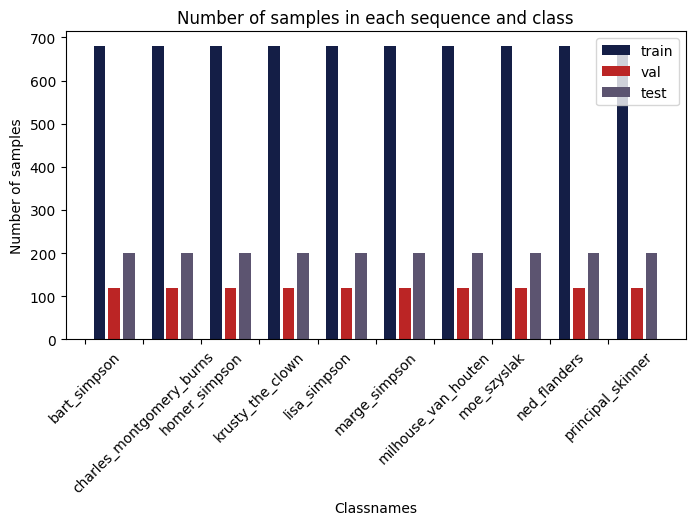

In [8]:
plt.figure(figsize=(8, 4))
id_to_class = train_dataset.id_to_cls
for cls, count in train_counter.items():
    plt.bar((4*cls)+1, count, label="train", color="#141E46")

for cls, count in val_counter.items():
    plt.bar((4*cls)+2, count, label="val", color="#BB2525")

for cls, count in test_counter.items():
    plt.bar((4*cls)+3, count, label="test", color="#5C5470")

plt.xticks(list(map(lambda it: it * 4, list(id_to_class.keys()))), list(id_to_class.values()), rotation=45)
plt.xlabel("Classnames")
plt.ylabel("Number of samples")
plt.title("Number of samples in each sequence and class")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Visualize Some Dataset Entries

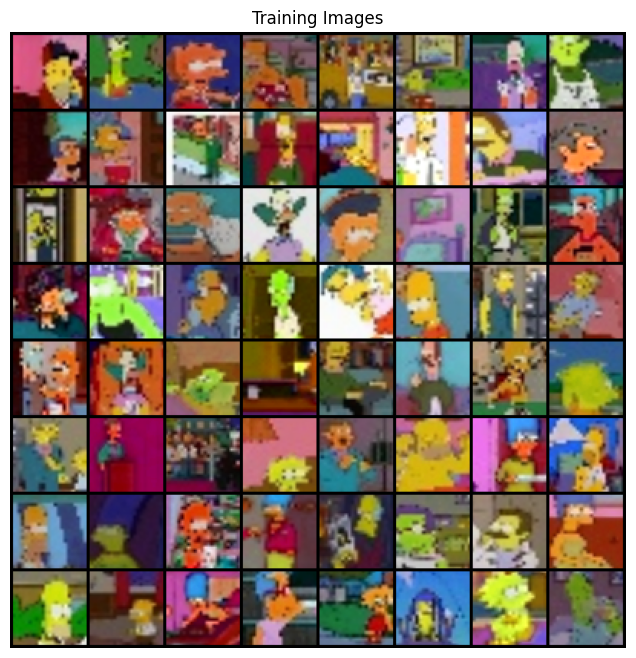

In [9]:
for images, _ in train_dataloader:
    break
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64],
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()